# Starbucks TESTING DOCUMENT { &#9982; }  { &#74448; } { &#9878; }
### 2019 July 8 
`Cameron.Cn`

` Cuneform Sign Shim Times Mug | &#74448; `

In [1]:
# beginning off by importing our libraries, as per usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode 
from pandas import read_excel

%matplotlib inline

In [2]:
# setting our data locations (all locations are ./)
sales1 = 'sales.csv'
direc1 = 'starbucksdirectory.csv'
starus1 = 'starbucksusa.csv'
starglob1 = 'storescountries.xlsx'
usMap1 = 'datasets_US_states(5m).json'
worMap1 = 'datasets_continents.json'

In [3]:
# we were having issues with reading, but it worked!
sales = pd.read_csv(sales1)
sales.head()

,Year,Revenue in billion U.S. dollars
0,2003,4.1
1,2004,5.3
2,2005,6.4
3,2006,7.8
4,2007,9.4


In [4]:
# this is a potentially clunky method, but one that we have used for stability
direc = pd.read_csv(direc1)
starus = pd.read_csv(starus1)
starglob = pd.read_excel(starglob1)
usMap = gpd.read_file(usMap1)
worMap = gpd.read_file(worMap1)

In [5]:
# retaining only the continental US just in case -- but using a different variable so that we may have
# both to compare side-by-side later on
map48 = usMap.loc[usMap['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
map48.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.190554 40.997607, -106.061181 4..."


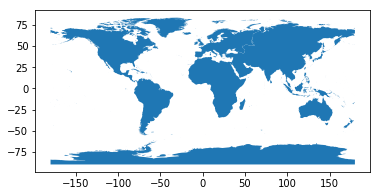

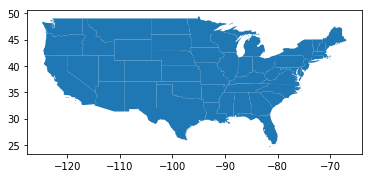

In [6]:
# our world map (stored in JSON format)
worMap.plot()
map48.plot()

In [7]:
print(direc.head(),      # taking a look at the different dataframes we now have -- all at once
      '\n---------\n',   # \n is a non-printing <br> character in python's print() function
     sales.head(),
      '\n---------\n',
     starus.head(),
      '\n---------\n',
     starglob.head())

       Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1 

In [8]:
direc.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [60]:
direc.tail()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Coordinates
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78,POINT (106.7 10.78)
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72,POINT (106.71 10.72)
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15,POINT (28.04 -26.15)
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79,POINT (28.28 -25.79)
25599,Starbucks,47609-253286,Mall of Africa,Licensed,"Shop 2077, Upper Level, Waterfall City",Midrand,GT,ZA,1682,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02,POINT (28.11 -26.02)


In [9]:
direc.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [10]:
# where is our one store missing?
# It makes sense that other columns have issues--not every country
# has US Post codes!
noLat = direc.loc[direc['Longitude'].isnull()]
noLat

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
8028,Starbucks,19773-160973,Yoido IFC Mall - 1F,Joint Venture,"23 & 23-1, Yoido-Dong, Yongdongpo-Gu, 1F, #101",Seoul,11,KR,153-023,NaN,GMT+09:00 Asia/Seoul,NaN,NaN


In [11]:
# Seoul is missing...let's see if we can find it
seoulmiss = geocode("23 & 23-1, Yoido-Dong, Yongdongpo-Gu, 1F, #101, Seoul, South Korea", provider='arcgis')
seoulmiss

,geometry,address
0,POINT (126.92903 37.52864000000005),"Yŏŭido-dong, Seoul"


In [12]:
# So we have the 126.92 and 37.528 but are those similar to other Seoul-based
# locations? Let's check!
direc.loc[direc['City'] == 'Seoul']

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
7982,Starbucks,19176-199455,Wolgae Emart,Joint Venture,"333-1 Wolgae3dong, Nowongu, Seoul",Seoul,11,KR,139-050,NaN,GMT+09:00 Asia/Seoul,127.06,37.63
7983,Starbucks,23428-230106,Olympic Park North Gate,Joint Venture,"468 Seongnae-dong,Gangdong-gu",Seoul,11,KR,134-848,NaN,GMT+09:00 Asia/Seoul,127.13,37.53
7984,Starbucks,49283-267704,Mia Newtown,Joint Venture,"812-2, Mia-dong, Gangbuk-gu",Seoul,11,KR,1195,NaN,GMT+09:00 Asia/Seoul,127.02,37.62
7985,Starbucks,21320-211245,Yangjae Station,Joint Venture,"14-4 Yangjae-dong, Seocho-gu",Seoul,11,KR,137-888,NaN,GMT+09:00 Asia/Seoul,127.04,37.48
7986,Starbucks,15565-163169,Apgujeong Center,Joint Venture,"639-7, Shinsa-Dong, Gangnam-Gu, Yonsei Foundat...",Seoul,11,KR,135-896,NaN,GMT+09:00 Asia/Seoul,127.04,37.53
7987,Starbucks,16087-168288,Yonsei east gate,Joint Venture,"115 Daesin-Dong, Seodaemun-Gu",Seoul,11,KR,120-160,NaN,GMT+09:00 Asia/Seoul,126.95,37.57
7988,Starbucks,17225-180406,Garak bondong,Joint Venture,97-4 Garak-dong Songpa-gu,Seoul,11,KR,138-804,NaN,GMT+09:00 Asia/Seoul,127.12,37.49
7989,Starbucks,23237-228666,Myeongil E-Mart,Joint Venture,"47-7 Myungil-dong,Gangdong-gu",Seoul,11,KR,134-825,NaN,GMT+09:00 Asia/Seoul,127.16,37.55
7990,Starbucks,47222-257364,Hwagok DT,Joint Venture,"772-67,Hwagok 4-dong, Gangseo-gu",Seoul,11,KR,7741,NaN,GMT+09:00 Asia/Seoul,126.86,37.54
7991,Starbucks,47985-260487,National Assemble Station,Joint Venture,"Yoido 17-3, Yeongdeungpo-gu",Seoul,11,KR,7236,NaN,GMT+09:00 Asia/Seoul,126.92,37.53


In [13]:
# now we can only do this because there is ONE value missing
# DO NOT DO THIS IF YOU HAVE MULTIPLE MISSING VALUES

direc['Longitude'].fillna('126.93', inplace=True)
direc['Latitude'].fillna('37.53', inplace=True)

In [14]:
direc.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            0
Latitude             0
dtype: int64

In [41]:
# our Long/Lat are objects, which prevents Point assigning later on if we let them
# stay that way
direc['Longitude'] = direc['Longitude'].astype(float)
print("Done")

Done


In [42]:
direc['Latitude'] = direc['Latitude'].astype(float)
print("Done")

Done


In [43]:
direc['Longitude'].dtype

dtype('float64')

In [44]:
# Making a single column to hold location data (long/lat)
direc['Coordinates'] = list(direc[['Longitude', 'Latitude']].values)
direc.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Coordinates
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,"[1.53, 42.51]"
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,"[55.47, 25.42]"
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,"[55.47, 25.39]"
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,"[54.38, 24.48]"
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,"[54.54, 24.51]"


In [45]:
# checking the data type
direc['Coordinates'].dtype

dtype('O')

In [46]:
direc['Coordinates'].head(15)

0      [1.53, 42.51]
1     [55.47, 25.42]
2     [55.47, 25.39]
3     [54.38, 24.48]
4     [54.54, 24.51]
5      [54.49, 24.4]
6      [54.49, 24.4]
7     [54.61, 24.46]
8     [55.69, 24.19]
9     [54.38, 24.48]
10    [54.34, 24.47]
11    [54.37, 24.49]
12    [55.69, 24.19]
13      [54.7, 24.3]
14     [54.6, 24.48]
Name: Coordinates, dtype: object

In [47]:
# we have to convert it to a point
direc['Coordinates'] = direc['Coordinates'].apply(Point)
direc.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Coordinates
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,POINT (1.53 42.51)
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,POINT (55.47 25.42)
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,POINT (55.47 25.39)
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,POINT (54.38 24.48)
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,POINT (54.54 24.51)


In [50]:
geo_direc = gpd.GeoDataFrame(direc, geometry='Coordinates')
geo_direc.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Coordinates
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,POINT (1.53 42.51)
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,POINT (55.47 25.42)
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,POINT (55.47 25.39)
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,POINT (54.38 24.48)
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,POINT (54.54 24.51)


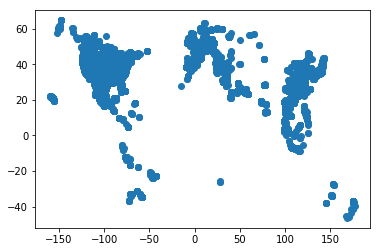

In [53]:
x = geo_direc['Longitude']
y = geo_direc['Latitude']

plt.scatter(x,y, data = geo_direc)

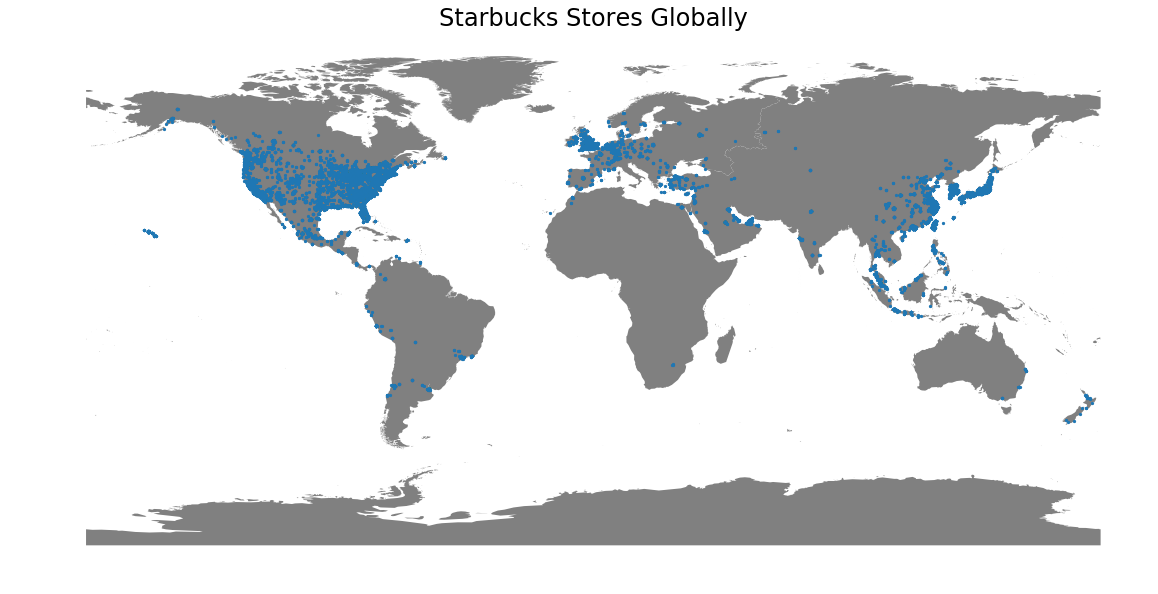

In [59]:
fig, ax = plt.subplots(1, figsize=(20,20))
basemap = worMap.plot(ax=ax, color='grey')
geo_direc.plot(ax=basemap, marker='.', markersize=20)

ax.axis('off')
ax.set_title("Starbucks Stores Globally", fontsize=24)
plt.savefig("starbucks_world-map.png")

In [65]:
starusa = geo_direc[geo_direc['Country'] == 'US']
starusa.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Coordinates
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,907-339-0900,GMT-09:00 America/Anchorage,-149.78,61.21,POINT (-149.78 61.21)
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,995073444,907-339-2800,GMT-09:00 America/Anchorage,-149.84,61.14,POINT (-149.84 61.14)
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,995153596,907-339-1300,GMT-09:00 America/Anchorage,-149.85,61.11,POINT (-149.85 61.11)
11967,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,(907) 227-9631,GMT-09:00 America/Anchorage,-149.89,61.13,POINT (-149.89 61.13)
11968,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,995152050,907-344-4160,GMT-09:00 America/Anchorage,-149.86,61.14,POINT (-149.86 61.14)


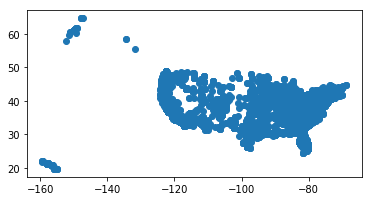

In [69]:
starusa.plot()

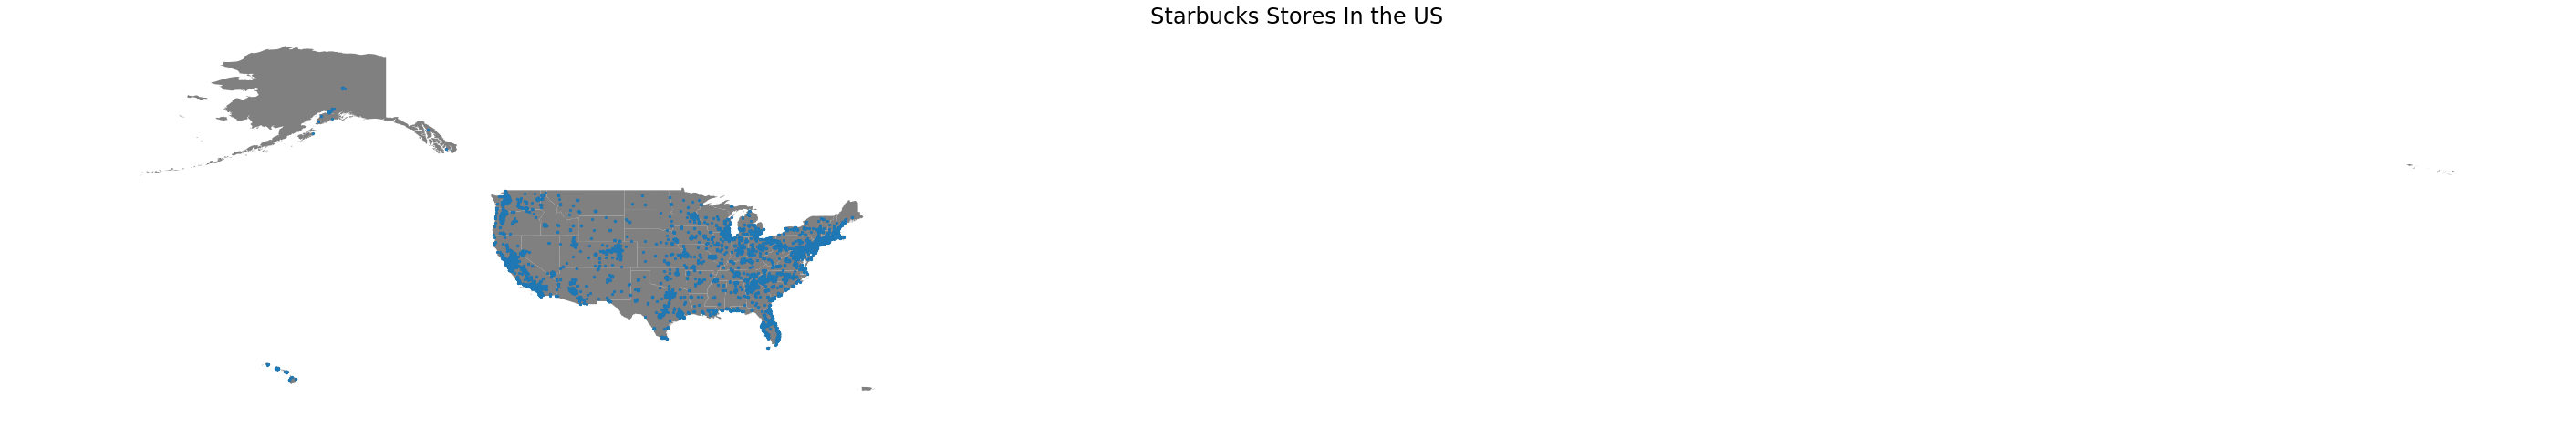

In [81]:
fig, ax = plt.subplots(1, figsize=(50,50))
basemap = usMap.plot(ax=ax, color='grey')
starusa.plot(ax=basemap, marker='.', markersize=20)

ax.axis('off')
ax.set_title("Starbucks Stores In the US", fontsize=24)
plt.savefig("starbucks_usa-map.png")